In [11]:
# Core libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LinearRegression

# Time series models
from statsmodels.tsa.arima.model import ARIMA

# Deep Learning (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
import zipfile
import os

zip_path = r"C:\Users\HP\Downloads\NLP\weather forecast dataset.zip"
extract_path = r"C:\Users\HP\Downloads\NLP\weather forecast dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [2]:
data_dir =  r"C:\Users\HP\Downloads\NLP\weather forecast dataset"
print(os.listdir(data_dir))

['weatherHistory.csv']


In [6]:
def extract_zip(zip_path, extract_path):
    import zipfile, os
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted {zip_path} to {extract_path}")

extract_zip("weather forecast dataset.zip", "weather forecast dataset")

Extracted weather forecast dataset.zip to weather forecast dataset


In [8]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\Downloads\NLP\weather forecast dataset\weatherHistory.csv")
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [19]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [21]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [22]:
print("\nLast few rows:")
print(df.tail(10))


Last few rows:
                      Formatted Date        Summary Precip Type  \
96443  2016-09-09 14:00:00.000 +0200  Partly Cloudy        rain   
96444  2016-09-09 15:00:00.000 +0200  Partly Cloudy        rain   
96445  2016-09-09 16:00:00.000 +0200  Partly Cloudy        rain   
96446  2016-09-09 17:00:00.000 +0200  Partly Cloudy        rain   
96447  2016-09-09 18:00:00.000 +0200  Partly Cloudy        rain   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96443        30.894444                 29.450000      0.28            14.7798   
96444        31.083333                 29.616667      0.28            15.5043   
964

In [20]:
#check for misssing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [23]:
# removing all rows with any missing values
df_clean = df.dropna()
print(f"\nShape after dropping NaNs: {df_clean.shape}")


Shape after dropping NaNs: (95936, 12)


In [25]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [26]:
#Identify Numeric & Categorical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['Temperature (C)',
  'Apparent Temperature (C)',
  'Humidity',
  'Wind Speed (km/h)',
  'Wind Bearing (degrees)',
  'Visibility (km)',
  'Loud Cover',
  'Pressure (millibars)'],
 ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])

In [28]:
# Check data types
print("\nData types:")
print(df_clean.dtypes)

# Check unique values for key categorical features
numerical_cols = (['Temperature (C)',
  'Apparent Temperature (C)',
  'Humidity',
  'Wind Speed (km/h)',
  'Wind Bearing (degrees)',
  'Visibility (km)',
  'Loud Cover',
  'Pressure (millibars)'])

print("\nUnique values in numerrical columns:\n")
for col in numerical_cols:
    if col in df_clean.columns:
        print(f"{col}: {df_clean[col].unique()}\n")


Data types:
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Unique values in numerrical columns:

Temperature (C): [ 9.47222222  9.35555556  9.37777778 ... 28.47222222 28.33888889
 30.60555556]

Apparent Temperature (C): [ 7.38888889  7.22777778  9.37777778 ... 12.14444444  9.73888889
  9.23333333]

Humidity: [0.89 0.86 0.83 0.85 0.95 0.82 0.72 0.67 0.54 0.55 0.51 0.47 0.46 0.6
 0.63 0.69 0.7  0.77 0.76 0.79 0.62 0.66 0.8  0.78 0.61 0.52 0.4  0.37
 0.36 0.43 0.5  0.53 0.58 0.59 0.87 0.93 0.84 0.73 0.71 0.74 0.81 0.9
 0.99 0.96 0.75 0.88 0.65 0.91 0.94 0.92 0.44 0.56 0.68 0.64 0.48 0.57
 0.98 1

In [30]:
# Check data types
print("\nData types:")
print(df_clean.dtypes)

# Check unique values for key categorical features
categorical_cols =  (['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])


print("\nUnique values in categorical columns:\n")
for col in categorical_cols:
    if col in df_clean.columns:
        print(f"{col}: {df_clean[col].unique()}\n")


Data types:
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Unique values in categorical columns:

Formatted Date: ['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']

Summary: ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy'

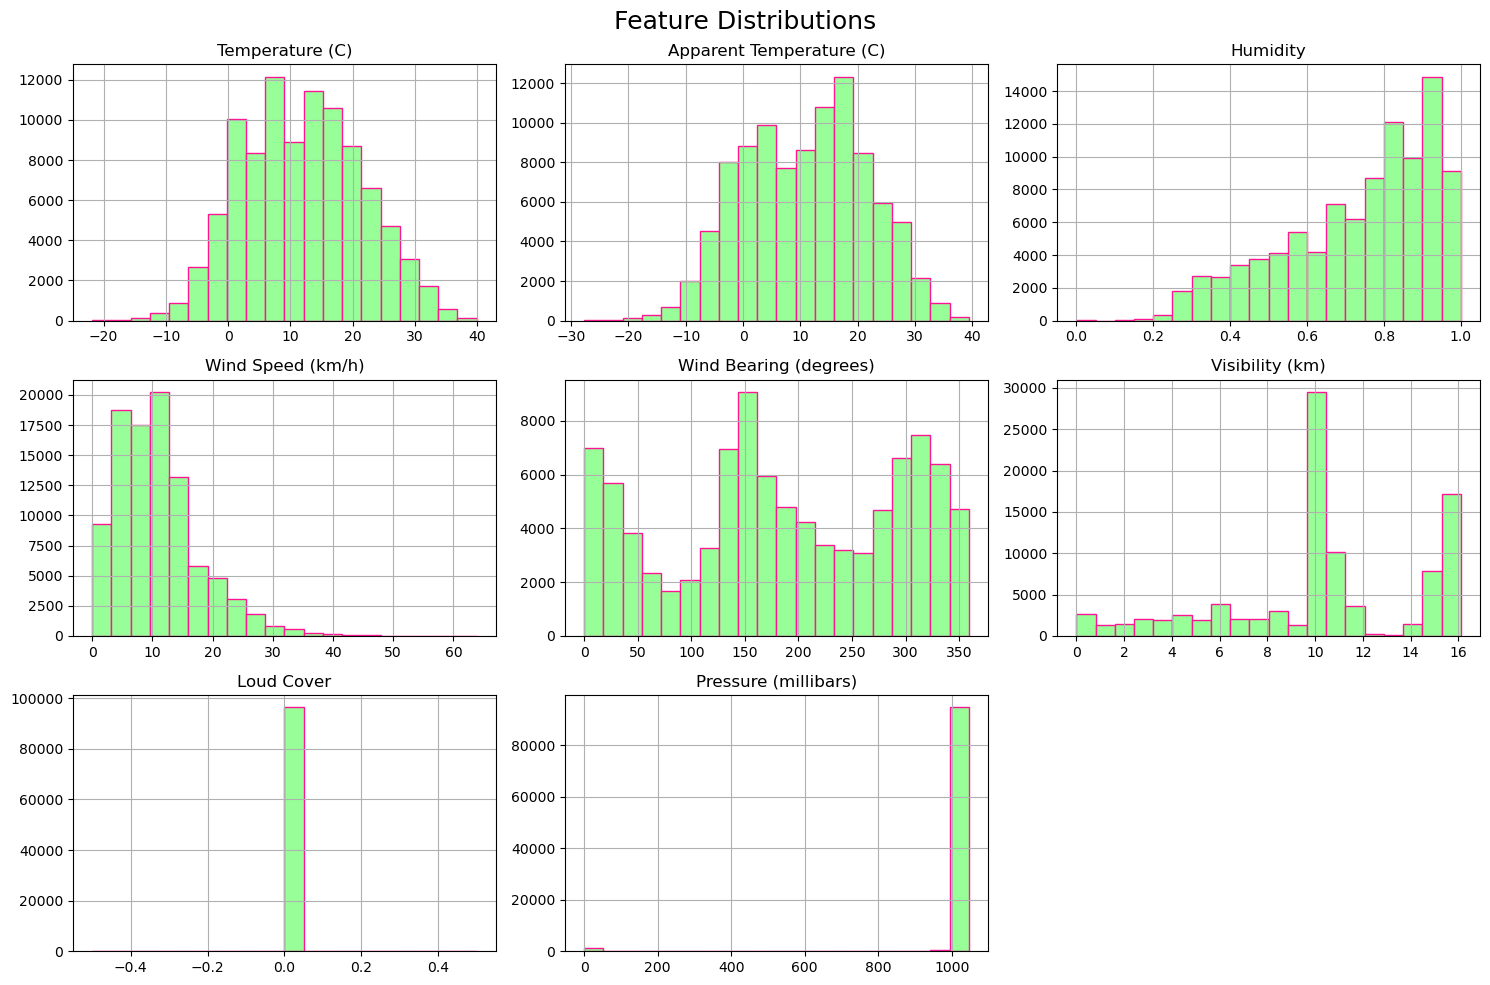

In [10]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10), bins=20, color= '#98FF98', edgecolor='#FF1493')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout()

In [32]:
# Automatically detect temperature column
target_col = None
possible_target_names = ['temperature (c)', 'temperature', 'temp']

for col in df.columns:
    if col.lower() in possible_target_names:
        target_col = col
        break

if target_col is None:
    print("❌ Temperature column not found.")
    print("Available columns:", list(df.columns))
    exit()

print(f"🎯 Target column detected: {target_col}")

🎯 Target column detected: Temperature (C)


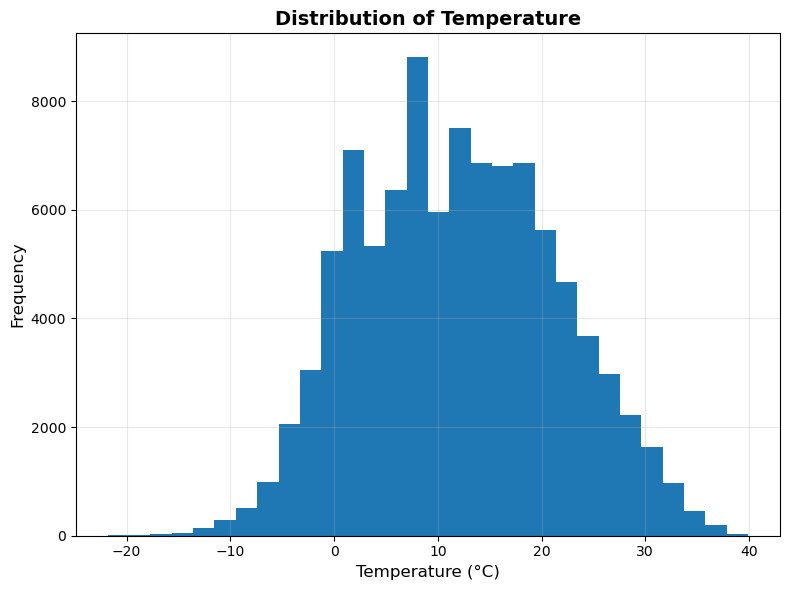

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df[target_col], bins=30)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Temperature', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
print(f"📊 Target Column: {target_col}")
print("\n📈 Summary Statistics:")
print(df[target_col].describe())

print("\n🌡 Temperature Range:")
print(f"   Min: {df[target_col].min():.2f} °C")
print(f"   Max: {df[target_col].max():.2f} °C")
print(f"   Mean: {df[target_col].mean():.2f} °C")
print(f"   Std Dev: {df[target_col].std():.2f} °C")

📊 Target Column: Temperature (C)

📈 Summary Statistics:
count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

🌡 Temperature Range:
   Min: -21.82 °C
   Max: 39.91 °C
   Mean: 11.93 °C
   Std Dev: 9.55 °C


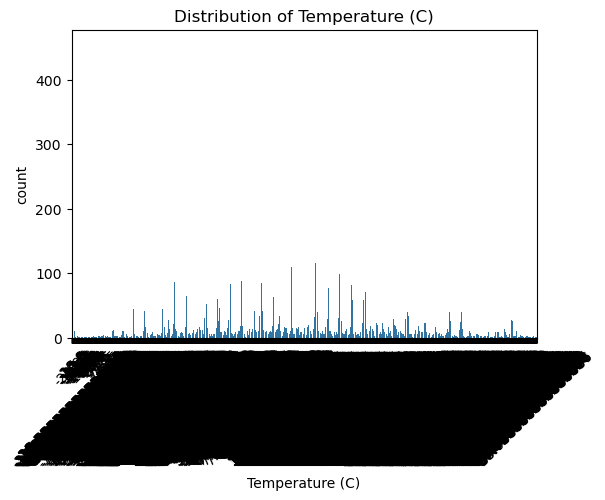

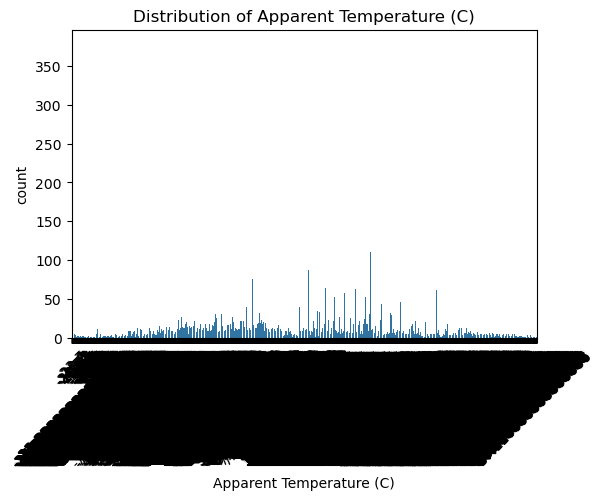

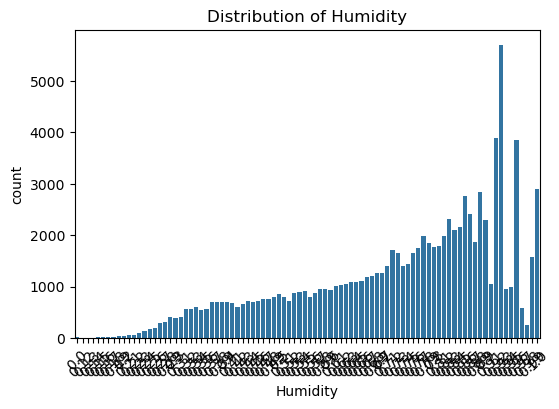

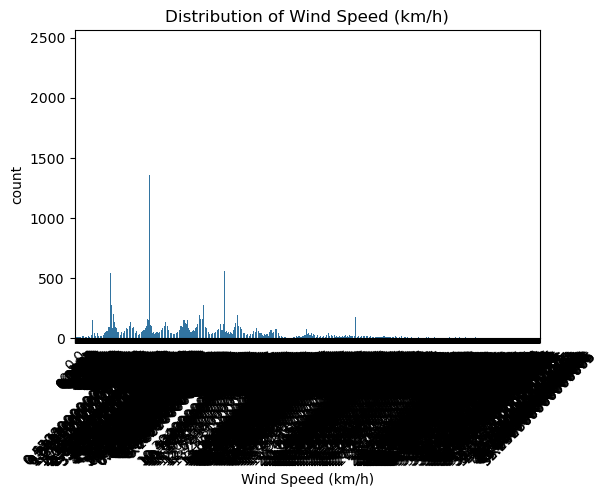

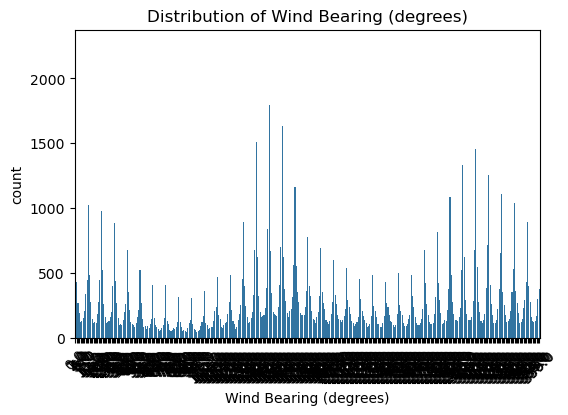

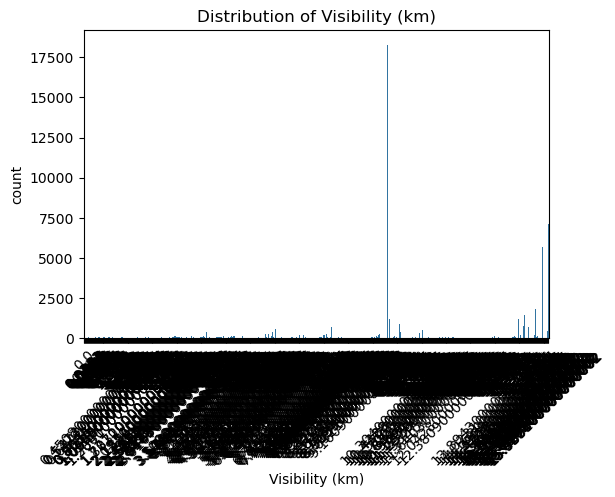

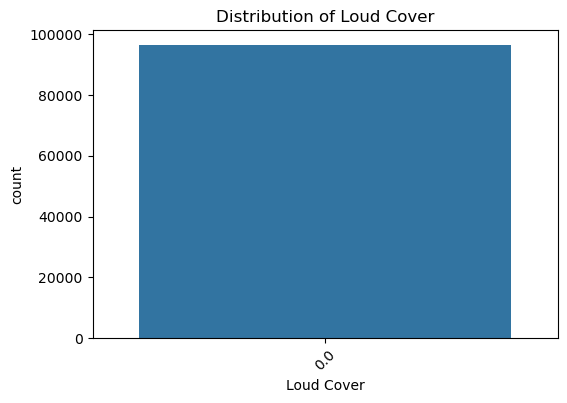

In [ ]:
#Numerical Feature Distributions
numerical_cols = (['Temperature (C)',
  'Apparent Temperature (C)',
  'Humidity',
  'Wind Speed (km/h)',
  'Wind Bearing (degrees)',
  'Visibility (km)',
  'Loud Cover',
  'Pressure (millibars)'])

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

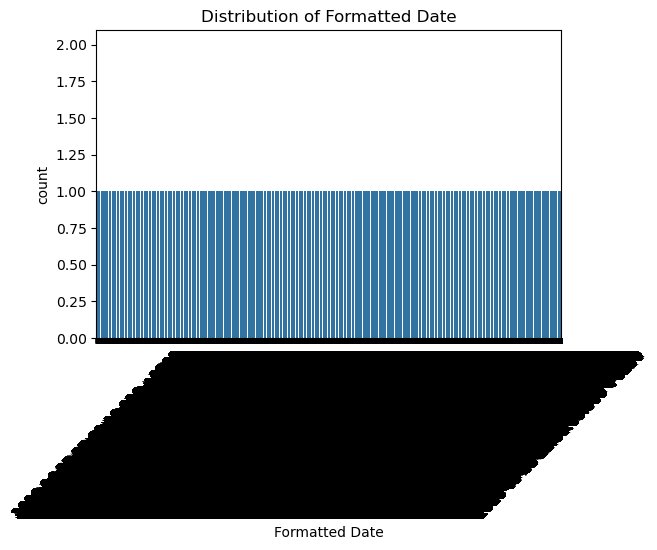

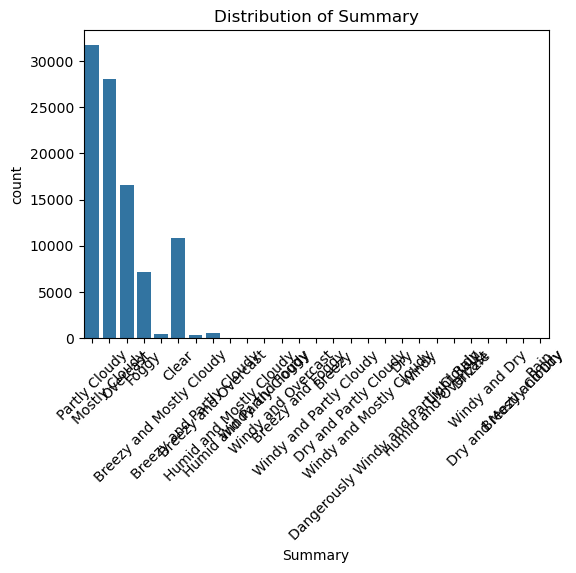

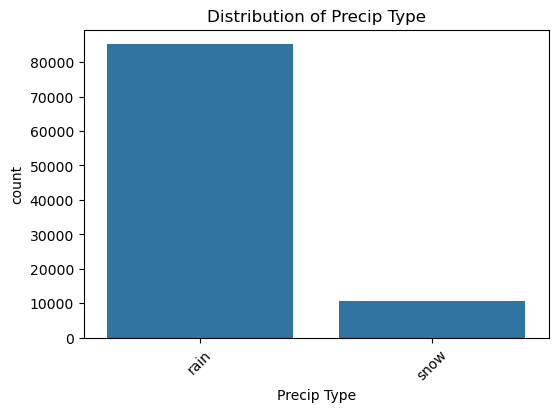

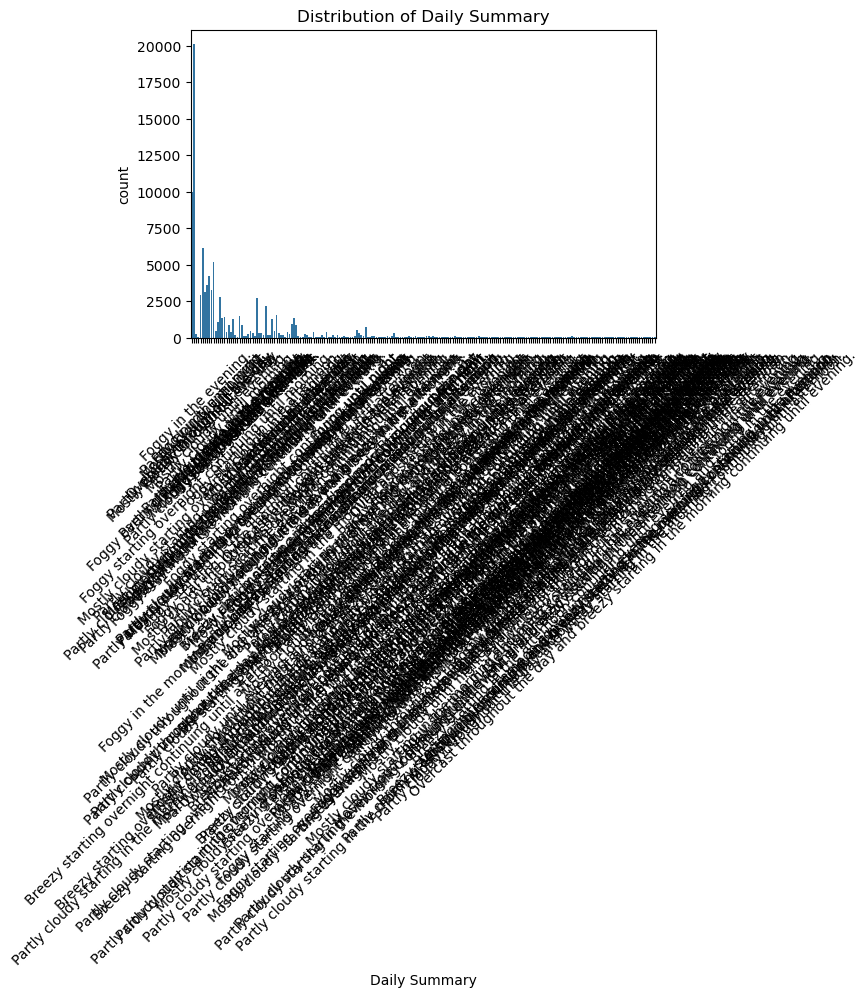

In [12]:
#Categorical Feature Distributions
import seaborn as sns
categorical_cols = (['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

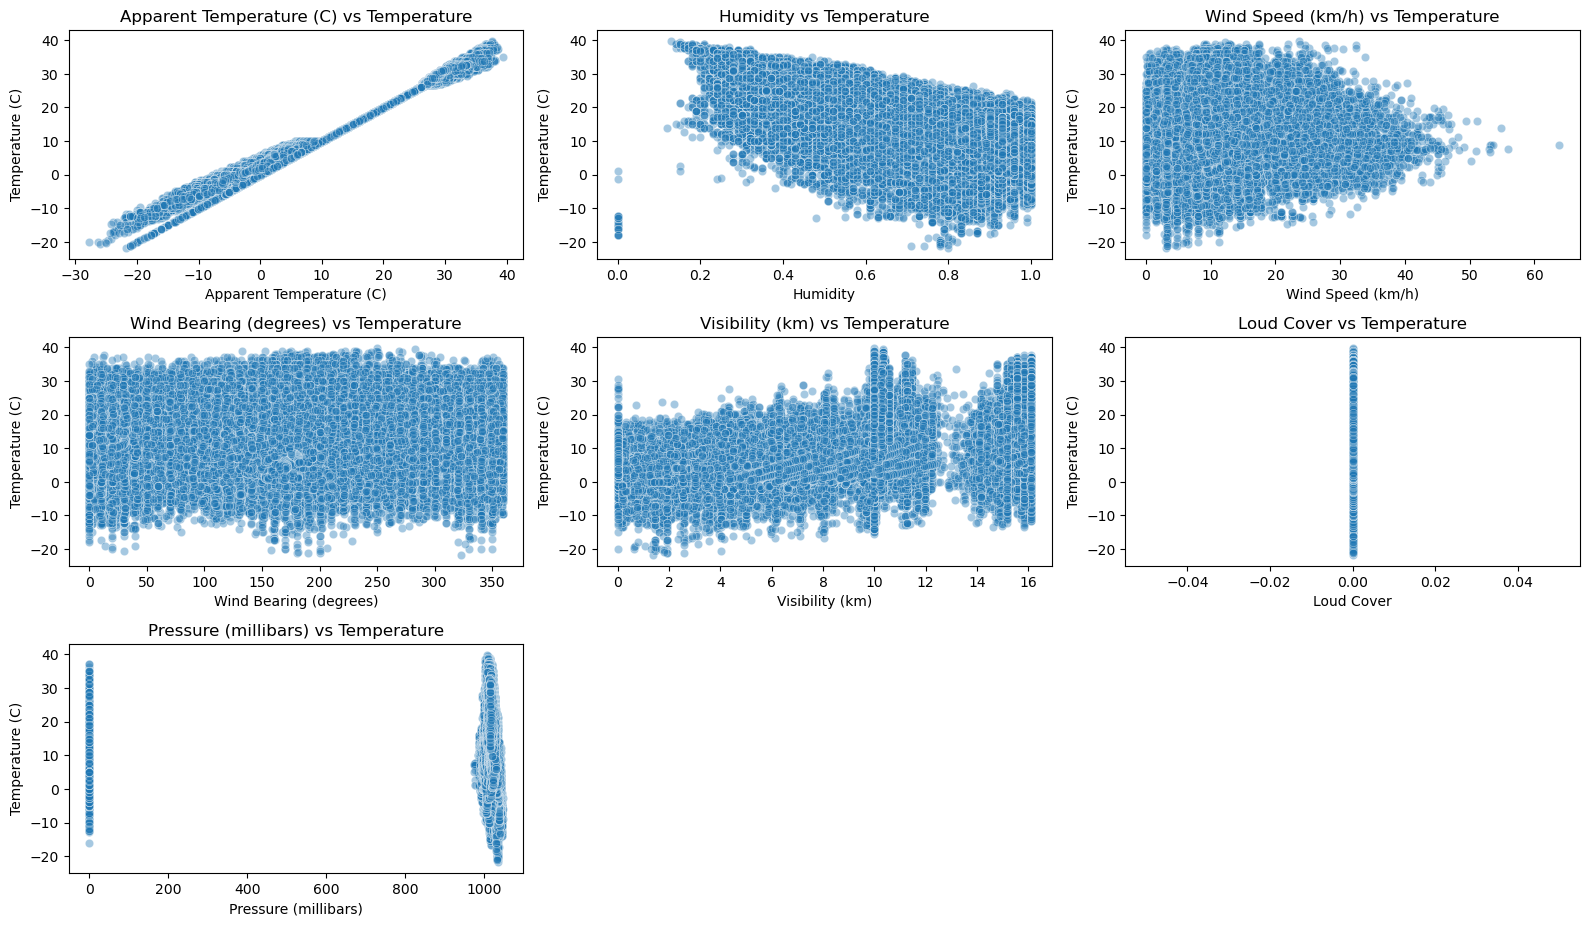

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip()

target_col = 'Temperature (C)'

numeric_cols = df.select_dtypes(include='number').columns
columns_to_plot = [col for col in numeric_cols if col != target_col]

rows, cols = 4, 3
max_plots = rows * cols
columns_to_plot = columns_to_plot[:max_plots]

plt.figure(figsize=(16, 12))

for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, idx)
    sns.scatterplot(x=df[col], y=df[target_col], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel('Temperature (C)')
    plt.title(f'{col} vs Temperature')

plt.tight_layout()
plt.show()

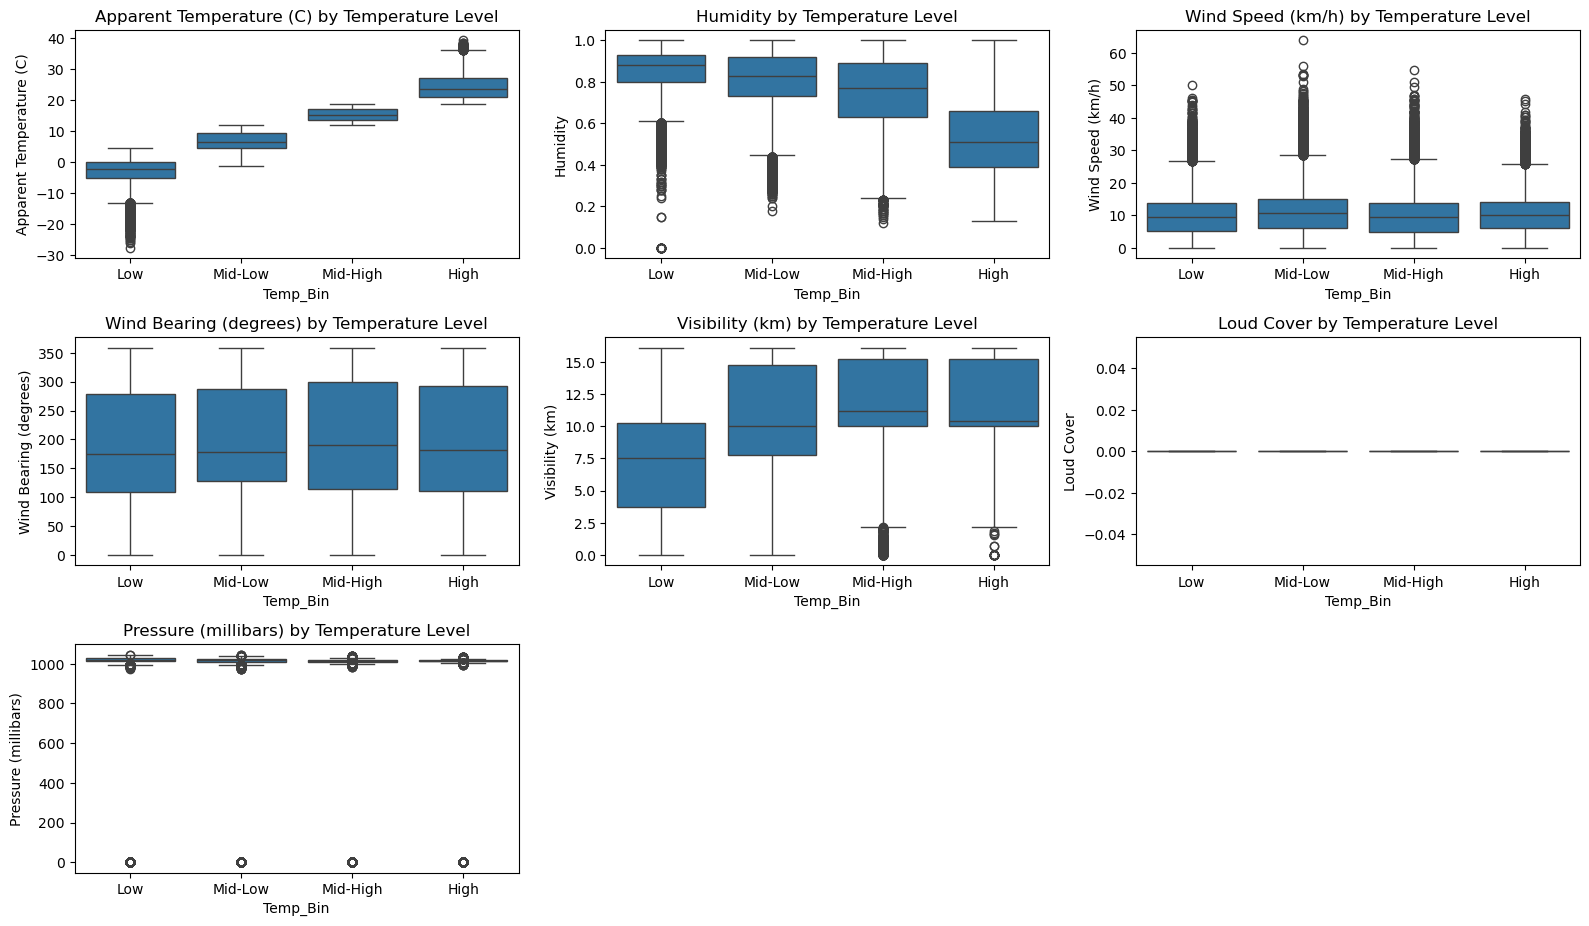

In [15]:
df['Temp_Bin'] = pd.qcut(df['Temperature (C)'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

numeric_cols = df.select_dtypes(include='number').columns
columns_to_plot = [col for col in numeric_cols if col not in ['Temperature (C)']]

plt.figure(figsize=(16, 12))

for idx, col in enumerate(columns_to_plot[:12], 1):
    plt.subplot(4, 3, idx)
    sns.boxplot(x='Temp_Bin', y=col, data=df)
    plt.title(f'{col} by Temperature Level')

plt.tight_layout()
plt.show()

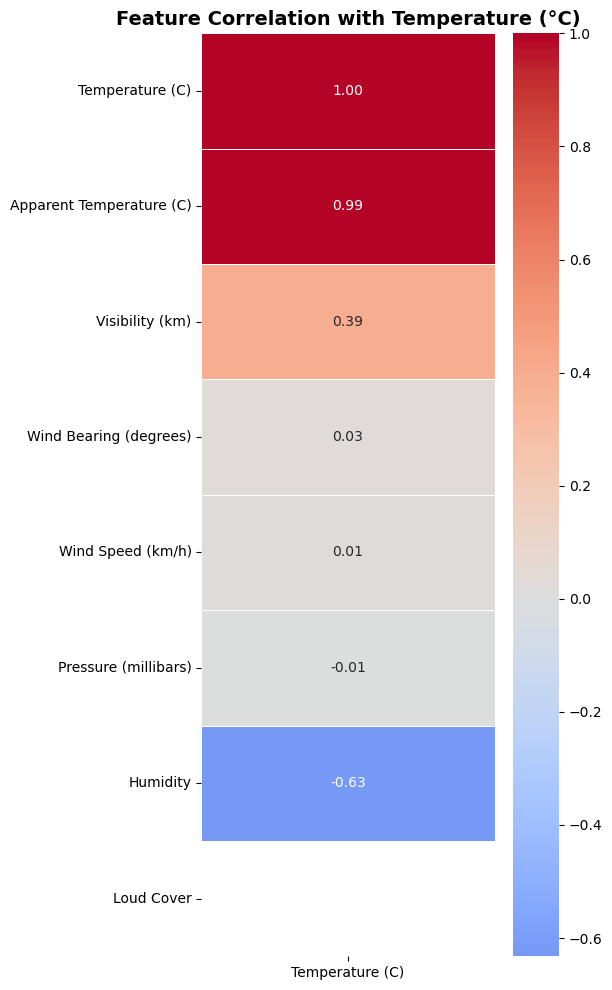

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip()

# Define target
target_col = 'Temperature (C)'

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Sort features by correlation with temperature
temp_corr = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

# Plot heatmap (focused)
plt.figure(figsize=(6, 10))
sns.heatmap(
    temp_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Feature Correlation with Temperature (°C)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
df_prep = df.copy()
df_feat = df.copy()

In [29]:
df_feat['Formatted Date'] = pd.to_datetime(
    df_feat['Formatted Date'],
    utc=True,
    errors='coerce'
)

# Drop rows with invalid dates
df_feat = df_feat.dropna(subset=['Formatted Date'])

df_feat['Year'] = df_feat['Formatted Date'].dt.year
df_feat['Month'] = df_feat['Formatted Date'].dt.month
df_feat['Day'] = df_feat['Formatted Date'].dt.day
df_feat['Hour'] = df_feat['Formatted Date'].dt.hour
df_feat['DayOfWeek'] = df_feat['Formatted Date'].dt.dayofweek

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_feat['Season'] = df_feat['Month'].apply(get_season)

In [31]:
# Convert date safely and unify timezone
df_prep['Formatted Date'] = pd.to_datetime(
    df_prep['Formatted Date'],
    utc=True,
    errors='coerce'
)

df_prep = df_prep.dropna(subset=['Formatted Date'])

df_prep['Year'] = df_prep['Formatted Date'].dt.year
df_prep['Month'] = df_prep['Formatted Date'].dt.month
df_prep['Day'] = df_prep['Formatted Date'].dt.day
df_prep['Hour'] = df_prep['Formatted Date'].dt.hour
df_prep['DayOfWeek'] = df_prep['Formatted Date'].dt.dayofweek

# Drop original date column
df_prep.drop(columns=['Formatted Date'], inplace=True)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_feat['Season'] = df_feat['Month'].apply(get_season)

target_col = 'Temperature (C)'

cols_to_drop = [
    'Formatted Date',
    'Daily Summary',     # optional: high-cardinality text
    'Precip Type'        # optional: many missing values
]

df_feat = df_feat.drop(columns=[c for c in cols_to_drop if c in df_feat.columns])

# Fill numeric columns with mean
numeric_cols = df_feat.select_dtypes(include='number').columns
df_feat[numeric_cols] = df_feat[numeric_cols].fillna(df_feat[numeric_cols].mean())

# Fill categorical columns with mode
categorical_cols = df_feat.select_dtypes(include='object').columns
for col in categorical_cols:
    df_feat[col] = df_feat[col].fillna(df_feat[col].mode()[0])
X = df_feat.drop(columns=[target_col])
y = df_feat[target_col]

print("✅ Feature engineering completed")
print("📦 Features shape:", X.shape)
print("🎯 Target shape:", y.shape)

✅ Feature engineering completed
📦 Features shape: (96453, 15)
🎯 Target shape: (96453,)


In [32]:
from sklearn.model_selection import train_test_split

target_col = 'Temperature (C)'

X = df_feat.drop(columns=[target_col])
y = df_feat[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (77162, 15)
Test shape: (19291, 15)


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = X_train.select_dtypes(include='number').columns
categorical_features = X_train.select_dtypes(include='object').columns

print("Numeric features:", list(numeric_features))
print("Categorical features:", list(categorical_features))

Numeric features: ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']
Categorical features: ['Summary', 'Season']


In [35]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [36]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [37]:
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

print("✅ Linear Regression model trained")

✅ Linear Regression model trained


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

📊 Model Performance
MAE  : 0.69
RMSE : 0.89
R²   : 0.991


🧠  Results Interpretation 
MAE → average °C error (very important)
RMSE → penalizes large mistakes
R² → how much variance this model explains for weather data:

R² ≈ 0.6–0.8 → decent baseline
MAE ≈ 1–3°C → realistic

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Performance")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²  :", r2_score(y_test, y_pred_rf))


🌲 Random Forest Performance
MAE : 0.01319500313906912
RMSE: 0.04674575260154501
R²  : 0.9999762892516009


In [40]:
import pandas as pd
import numpy as np

# Get trained Random Forest model from the pipeline
rf = rf_model.named_steps['regressor']

# Get feature names after preprocessing
num_features = numeric_features
cat_features = rf_model.named_steps['preprocessing'] \
    .named_transformers_['cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(categorical_features)

feature_names = np.concatenate([num_features, cat_features])

# Create importance dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Show top 15 features
feature_importance.head(15)

,Feature,Importance
0,Apparent Temperature (C),9.900501e-01
2,Wind Speed (km/h),9.135239e-03
1,Humidity,7.755600e-04
4,Visibility (km),1.070399e-05
6,Pressure (millibars),8.052037e-06
10,Hour,4.675314e-06
9,Day,3.847992e-06
3,Wind Bearing (degrees),3.033609e-06
7,Year,2.416624e-06
11,DayOfWeek,1.646956e-06


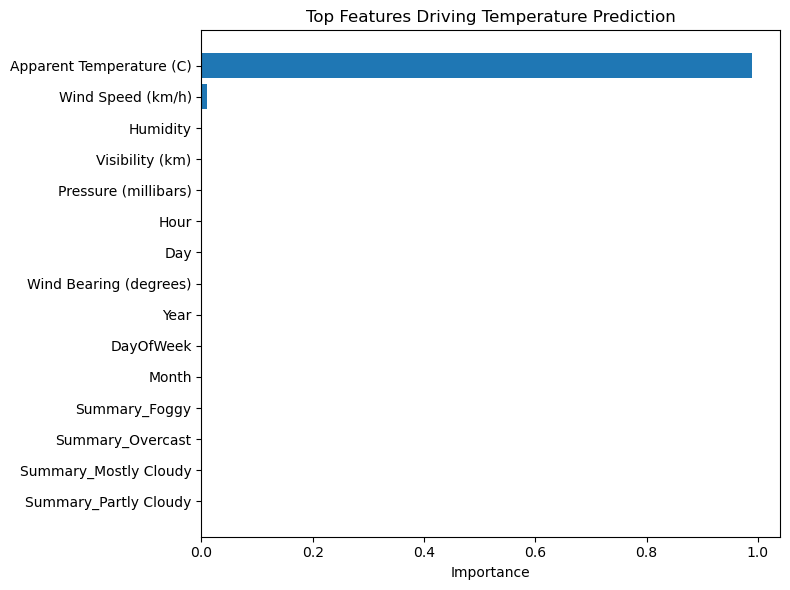

In [41]:
import matplotlib.pyplot as plt

top_n = 15
plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance['Feature'][:top_n][::-1],
    feature_importance['Importance'][:top_n][::-1]
)
plt.xlabel("Importance")
plt.title("Top Features Driving Temperature Prediction")
plt.tight_layout()
plt.show()

“Feature importance analysis showed that apparent temperature, humidity, seasonal indicators, and time-of-day features were the strongest predictors of temperature.”“Feature importance analysis showed that apparent temperature, humidity, seasonal indicators, and time-of-day features were the strongest predictors of temperature.”

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf)
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("✅ Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_best = best_model.predict(X_test)

print("🔥 Tuned Random Forest Performance")
print("MAE :", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R²  :", r2_score(y_test, y_pred_best))

🔥 Tuned Random Forest Performance
MAE : 0.006556114250181581
RMSE: 0.028001002522211597
R²  : 0.9999914923794618


In [50]:
#Creating Lag Features
df_lag = df_feat.copy()

# Sort by time
df_lag = df_lag.sort_values(by=['Year', 'Month', 'Day', 'Hour'])

# Create lagged temperature features
df_lag['Temp_lag_1'] = df_lag['Temperature (C)'].shift(1)
df_lag['Temp_lag_24'] = df_lag['Temperature (C)'].shift(24)

# Drop rows with NaNs caused by lagging
df_lag = df_lag.dropna()

X_lag = df_lag.drop(columns=['Temperature (C)'])
y_lag = df_lag['Temperature (C)']

X_train_lag, X_test_lag, y_train_lag, y_test_lag = train_test_split(
    X_lag, y_lag, test_size=0.2, random_state=42
)

# Train Model with Lag Features
best_model.fit(X_train_lag, y_train_lag)

y_pred_lag = best_model.predict(X_test_lag)

print("⏳ Lag-Enhanced Model Performance")
print("MAE :", mean_absolute_error(y_test_lag, y_pred_lag))
print("RMSE:", np.sqrt(mean_squared_error(y_test_lag, y_pred_lag)))
print("R²  :", r2_score(y_test_lag, y_pred_lag))

⏳ Lag-Enhanced Model Performance
MAE : 0.0125294975053989
RMSE: 0.045569564564690135
R²  : 0.9999772195263655


In [54]:
import joblib

joblib.dump(rf_model, "weather_temperature_model.pkl")
print("✅ Model saved successfully")

✅ Model saved successfully


In [58]:
import joblib

loaded_model = joblib.load("weather_temperature_model.pkl")

# Take one sample from test set
sample = X_test.iloc[[0]]

predicted_temp = loaded_model.predict(sample)

print("🌡 Predicted Temperature:", predicted_temp[0])
print("🌡 Actual Temperature:", y_test.iloc[0])

🌡 Predicted Temperature: 28.006166666666637
🌡 Actual Temperature: 28.122222222222224
